# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Virgie Beatrice
- **Email:** mc319d5x1413@student.devacademy.id
- **ID Dicoding:** MC319D5X1413

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pesanan dari 2016 sampai 2018?
- Kapan waktu terbaik pelanggan melakukan pemesanan?

## Import Semua Packages/Library yang Digunakan

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [186]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [187]:
customers = pd.read_csv('/content/drive/MyDrive/dataset/customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/dataset/geolocation_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/dataset/order_items_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/dataset/order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/dataset/order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/dataset/orders_dataset.csv')
category = pd.read_csv('/content/drive/MyDrive/dataset/product_category_name_translation.csv')
products = pd.read_csv('/content/drive/MyDrive/dataset/products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/dataset/sellers_dataset.csv')

In [188]:
print(customers.head())
print(order_items.head())
print(payments.head())
print(reviews.head())
print(orders.head())
print(category.head())
print(products.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3          

In [219]:
merged_orders = pd.merge(orders, order_items, on='order_id', how='left')
merged_data = pd.merge(merged_orders, customers, on='customer_id', how='left')
merged_data = pd.merge(merged_data, products, on='product_id', how='left')
merged_data = pd.merge(merged_data, sellers, on='seller_id', how='left')
merged_data = pd.merge(merged_data, payments, on='order_id', how='left')
merged_data = pd.merge(merged_data, reviews, on='order_id', how='left')
merged_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,1.0,credit_card,1.0,18.12,NaN,NaN,NaN,NaN,NaN,NaN
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3.0,voucher,1.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2.0,voucher,1.0,18.59,NaN,NaN,NaN,NaN,NaN,NaN
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,1.0,credit_card,3.0,179.12,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115028,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,1.0,credit_card,3.0,195.00,NaN,NaN,NaN,NaN,NaN,NaN
115029,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,1.0,credit_card,5.0,271.01,NaN,NaN,NaN,NaN,NaN,NaN
115030,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,1.0,credit_card,4.0,441.16,NaN,NaN,NaN,NaN,NaN,NaN
115031,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,1.0,credit_card,4.0,441.16,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- Dataset digabungkan mulai dari detail pesanan, produk, pelanggan, ulasan, hingga metode pembayaran. Dengan struktur ini, analisis dapat dilakukan untuk memahami pola pembelian pelanggan, produk paling laris, hubungan antara ulasan dan jumlah pesanan, serta metode pembayaran yang paling sering digunakan.

### Assessing Data

###### Memeriksa tipe data tiap kolom

In [190]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

###### Melihat missing value dari data

In [191]:
print(customers.isnull().sum())
print(order_items.isnull().sum())
print(payments.isnull().sum())
print(reviews.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2

###### Melihat banyak duplikat pada data

In [192]:
print("Jumlah duplikasi: ", merged_data.duplicated().sum())

Jumlah duplikasi:  0


###### Memeriksa parameter statistik dari kolom numerik

In [193]:
merged_data.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value
count,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143.000000,118146.000000,119140.000000,119140.000000,119140.000000
mean,1.196543,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35033.451298,4.015582,1.094737,2.941246,172.735135
std,0.699489,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29823.198969,1.400436,0.730141,2.777848,267.776077
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,1.000000,1.000000,60.850000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,5.000000,1.000000,2.000000,108.160000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,5.000000,1.000000,4.000000,189.240000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000


###### Memeriksa outlier

In [194]:
def outlier_threshold(column, dataframe=merged_data):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def outlier_detection(bounds, value):
  outlier_stat = None
  if value > bounds[1] or value < bounds[0]:
    outlier_stat = True
  else:
    outlier_stat = False
  return outlier_stat

def outlier_proportion(columns, dataframe=merged_data):
  results = pd.DataFrame(index=['False', 'True'], columns=columns)
  for column in columns:
    outlier_bounds = outlier_threshold(column)
    results.loc[:, column] = dataframe[column].apply(lambda x: outlier_detection(outlier_bounds, x)).value_counts().values
  return results

def outlier_percentage(columns, dataframe=merged_data):
    results = outlier_proportion(columns, dataframe)
    percentages = results.div(results.sum(axis=0), axis=1) * 100
    return percentages

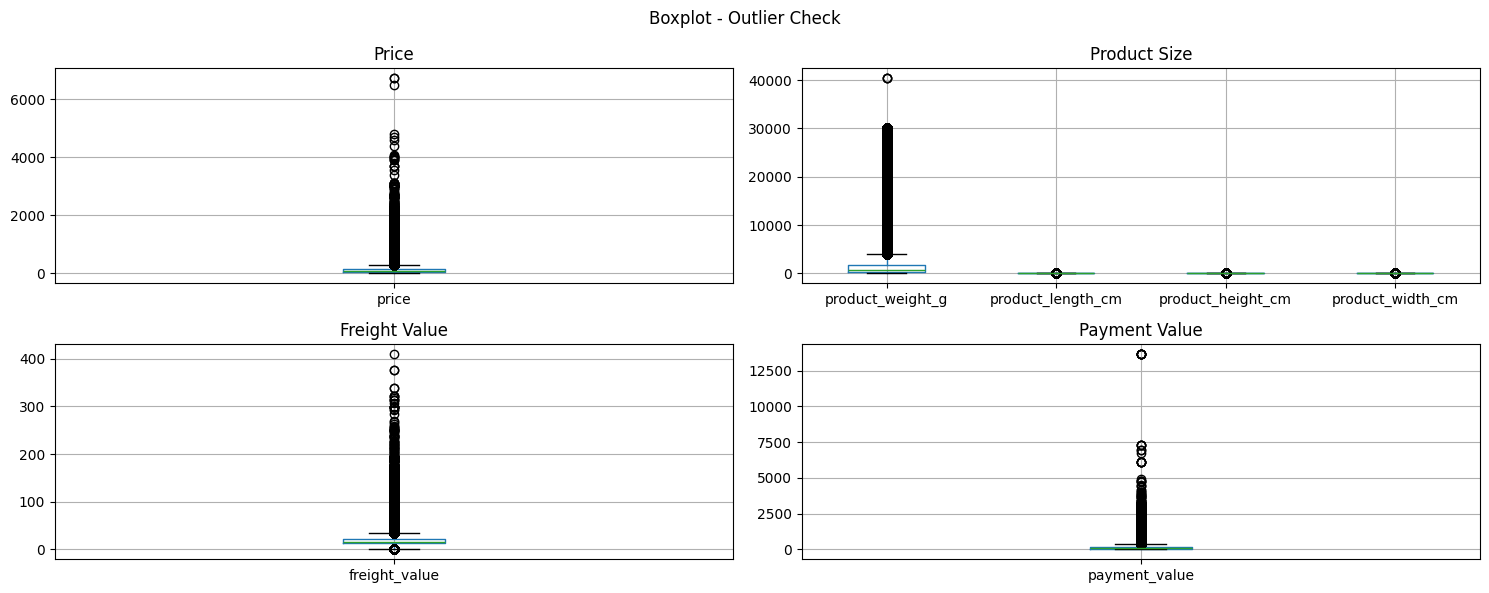

In [195]:
fig, multi_axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

merged_data.boxplot(column='price', ax=multi_axis[0, 0])
multi_axis[0, 0].set_title('Price')

merged_data.boxplot(column=['product_weight_g', 'product_length_cm',
                            'product_height_cm', 'product_width_cm'], ax=multi_axis[0, 1])
multi_axis[0, 1].set_title('Product Size')

merged_data.boxplot(column='freight_value', ax=multi_axis[1, 0])
multi_axis[1, 0].set_title('Freight Value')

merged_data.boxplot(column='payment_value', ax=multi_axis[1, 1])
multi_axis[1, 1].set_title('Payment Value')

fig.suptitle('Boxplot - Outlier Check')
plt.tight_layout()
plt.show()

In [196]:
outlier_proportion(['price', 'freight_value', 'product_weight_g',
    'product_length_cm', 'product_height_cm',
    'product_width_cm', 'payment_value'])

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value
False,110276,106403,102447,115321,111042,116389,109505
True,8867,12740,16696,3822,8101,2754,9638


In [197]:
outlier_percentage(['price', 'freight_value', 'product_weight_g',
    'product_length_cm', 'product_height_cm',
    'product_width_cm', 'payment_value'])

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value
False,92.557683,89.306967,85.986588,96.79209,93.200608,97.688492,91.910561
True,7.442317,10.693033,14.013412,3.20791,6.799392,2.311508,8.089439


**Insight:**
- Tipe data tanggal masih object, seharusnya tanggal bertipe data datetime.
- Terdapat missing value pada 14 kolom
- Tidak terdapat duplikasi pada tabel
- Rentang data pada kolom numerik masuk akal
- Pada kolom berat produk memiliki nilai 0, sedangkan berat itu tidak memiliki nilai 0 mutlak
- Persentase outlier pada kolom freight_value yang diatas 10% mengindikasikan bisa jadi ada produk dengan biaya pengiriman yang sangat mahal (misalnya pengiriman internasional atau produk besar)
- Persentase outlier pada kolom product_weight_g juga diatas 10% mengindikasikan ada beberapa produk dengan berat yang jauh lebih besar atau lebih kecil dibandingkan produk lain dalam dataset

### Cleaning Data

###### Mengubah nama kolom

In [198]:
new_name={
     'product_name_lenght':'product_name_length',
    'product_description_lenght':'product_description_length',
}
products= products.rename(columns=new_name)

###### Mengubah tipe data

In [199]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
merged_data[datetime_columns] = merged_data[datetime_columns].apply(pd.to_datetime)

# Melihat hasil perubahan tipe data
print(merged_data.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

###### Mengatasi missing value

In [200]:
dropna_columns = {
    'orders':['order_delivered_customer_date','order_approved_at','order_delivered_carrier_date'],
    'reviews': ['review_comment_title','review_comment_message'],
    'products':['product_category_name','product_name_length','product_description_length',
               'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']
}

for df_name, columns in dropna_columns.items():
    globals()[df_name] = globals()[df_name].dropna(subset=columns)

Kode ini bertujuan untuk membersihkan data dengan menghapus baris yang memiliki missing values (NaN) pada kolom tertentu dalam tiga dataset: orders, reviews, dan products.

In [201]:
# Cek nilai missing value
print(customers.isnull().sum())
print(order_items.isnull().sum())
print(payments.isnull().sum())
print(reviews.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int

##### Mengatasi nilai berat badan

In [202]:
# Menghitung median berat produk (tidak mengikutkan nilai 0)
median_weight = merged_data[merged_data['product_weight_g'] != 0]['product_weight_g'].median()

# Ganti 0 ke median
merged_data['product_weight_g'] = merged_data['product_weight_g'].replace(0, median_weight)

# Cek apakah nilai min sudah terganti
merged_data['product_weight_g'].describe()

,product_weight_g
count,118290.000000
mean,2112.298081
std,3786.673079
min,2.000000
25%,300.000000
50%,700.000000
75%,1800.000000
max,40425.000000


##### Mengatasi Outlier

Pertimbangan Freight Value (Biaya Pengiriman):

* Rentang nilainya dari 0 hingga 409.68, yang menunjukkan adanya variasi biaya pengiriman berdasarkan faktor seperti jarak, berat produk, atau kebijakan penjual.

* Nilai ekstrem mungkin wajar karena beberapa pesanan bisa memiliki biaya pengiriman yang sangat tinggi (misalnya, lokasi jauh atau layanan ekspres).

Kesimpulan: Tidak perlu menangani outlier karena data ini masih merepresentasikan skenario nyata dalam e-commerce.

Pertimbangan Product Weight (Berat Produk dalam Gram):

* Rentang nilainya dari 2 hingga 40,506 gram (sekitar 40 kg), yang mencerminkan beragam jenis produk yang dijual di platform.

* Beberapa produk mungkin sangat ringan (misalnya, aksesori) atau sangat berat (misalnya, peralatan rumah tangga).

Kesimpulan: Tidak perlu menangani outlier, karena variasi ini mencerminkan keberagaman produk yang dijual dan bukan kesalahan data.

**Insight:**
- Beberapa perubahan signifikan dilakukan untuk meningkatkan kualitas analisis. Kolom tanggal telah dikonversi ke format datetime agar mempermudah analisis berbasis waktu, seperti tren pesanan. Nama kolom yang typo telah diperbaiki agar lebih konsisten dan mudah digunakan. Kolom dengan banyak missing value yang tidak relevan dihapus untuk menghindari bias dalam analisis. Selain itu, nilai minimum pada atribut berat badan yang tidak wajar telah diganti dengan median agar distribusi data tetap representatif.
- Tidak perlu menangani outlier untuk kedua kolom ini, karena nilai ekstremnya masih masuk akal dan merupakan bagian dari distribusi data yang sebenarnya.

## Exploratory Data Analysis (EDA)

### Eksplor merged_data

#### Tren penjualan dari tahun ke tahun

In [203]:
# Mengecek apakah ada missing values pada kolom datetime setelah konversi sebelumnya
missing_values = merged_data['order_purchase_timestamp'].isna().sum()

# Menampilkan jumlah missing values di setiap kolom datetime
print("Missing values in datetime columns:")
print(missing_values)

Missing values in datetime columns:
0


In [204]:
# Pastikan kolom timestamp dalam format datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'], errors='coerce')

In [205]:
# Pastikan DataFrame tidak bermasalah dengan chained assignment
merged_data = merged_data.copy()

In [206]:
# Ekstrak tahun dan bulan dari order_purchase_timestamp
merged_data['order_year_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')

# Filter hanya untuk tahun 2016-2018
merged_data = merged_data[(merged_data['order_purchase_timestamp'].dt.year >= 2016) &
                          (merged_data['order_purchase_timestamp'].dt.year <= 2018)]

In [207]:
# Hitung jumlah order per bulan
month_order_counts = merged_data.groupby('order_year_month').size().reset_index(name='order_counts')

# Konversi period ke datetime agar bisa di-plot
month_order_counts['order_year_month'] = month_order_counts['order_year_month'].astype(str)

#### Waktu terbaik pelanggan melakukan pemesanan

In [208]:
# Ekstrak hari dalam format nama hari
merged_data['day_of_week'] = merged_data['order_purchase_timestamp'].dt.day_name()

In [209]:
# Ekstrak jam pemesanan
merged_data['order_hour'] = merged_data['order_purchase_timestamp'].dt.hour

# Kategorikan waktu pemesanan
def categorize_order_time(hour):
    if 0 <= hour < 6:
        return "Dawn"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 15:
        return "Noon"
    elif 15 <= hour < 18:
        return "Evening"
    else:
        return "Night"

In [210]:
merged_data['order_time_category'] = merged_data['order_hour'].apply(categorize_order_time)

**Insight:**
- Analisis penjualan bertujuan untuk memahami tren jumlah pesanan e-commerce dari tahun 2016 hingga 2018 berdasarkan data transaksi bulanan. Kita dapat mengidentifikasi pola musiman, lonjakan permintaan, serta bulan dengan volume pesanan tertinggi.
- Analisis waktu bertujuan untuk memahami pola pemesanan pada e-commerce berdasarkan hari dan waktu transaksi. Dengan mengidentifikasi tren jumlah pesanan per hari dalam seminggu serta kategori waktu pemesanan (Dawn, Morning, Noon, Evening, Night), kita dapat mengetahui kapan aktivitas pembelian paling tinggi dan rendah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pesanan dari 2016 sampai 2018?

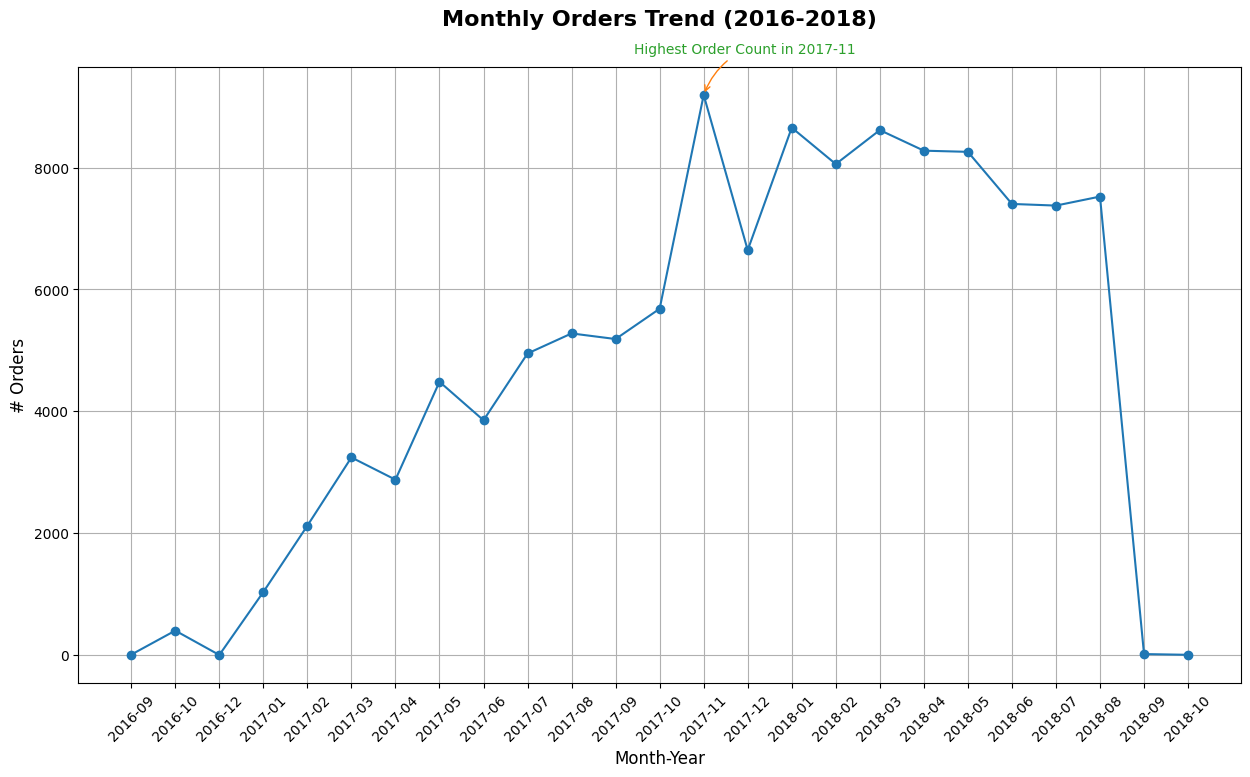

In [211]:
# Plot tren order bulanan
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(month_order_counts['order_year_month'], month_order_counts['order_counts'], marker='o', color=sns.color_palette()[0])

# Tambahkan anotasi untuk bulan dengan order tertinggi
max_order = month_order_counts.loc[month_order_counts['order_counts'].idxmax()]
ax.annotate(f'Highest Order Count in {max_order["order_year_month"]}',
            (max_order['order_year_month'], max_order['order_counts']),
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color=sns.color_palette()[1]),
            color=sns.color_palette()[2])

# Atur format tampilan
plt.xticks(rotation=45)
plt.title('Monthly Orders Trend (2016-2018)', fontsize=16, fontweight='bold', pad=30)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('# Orders', fontsize=12)
plt.grid(True)

plt.show()

**Insight:**
- Jumlah pesanan mengalami pertumbuhan signifikan dari 2016 hingga 2017, dengan puncaknya pada November 2017. Tren ini menunjukkan adanya peluang untuk memahami faktor pendorong lonjakan pesanan dan strategi mempertahankan tingkat pesanan setelah periode puncak.

### Pertanyaan 2: Kapan waktu terbaik pelanggan melakukan pemesanan?

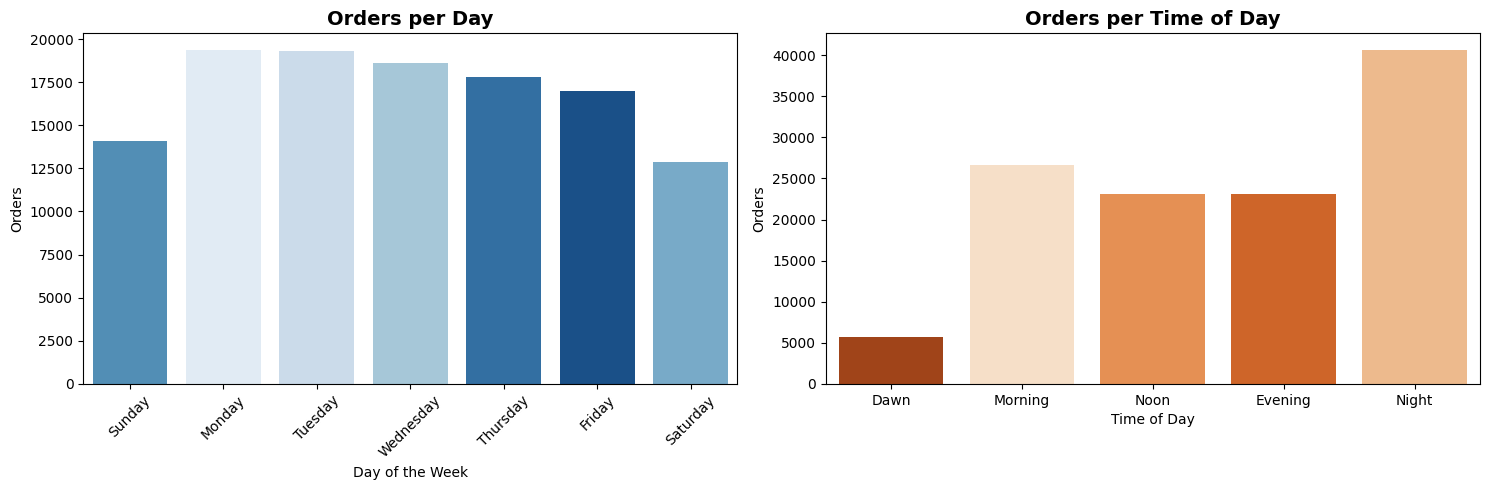

In [212]:
# Urutan hari dan waktu
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
time_order = ["Dawn", "Morning", "Noon", "Evening", "Night"]

# Buat visualisasi
plt.figure(figsize=(15, 5))

# Plot jumlah order per hari
plt.subplot(1, 2, 1)
sns.countplot(data=merged_data, x='day_of_week', order=day_order, hue='day_of_week', palette='Blues', legend=False)
plt.title('Orders per Day', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.xticks(rotation=45)

# Plot jumlah order berdasarkan kategori waktu pemesanan
plt.subplot(1, 2, 2)
sns.countplot(data=merged_data, x='order_time_category', order=time_order, hue='order_time_category', palette='Oranges', legend=False)
plt.title('Orders per Time of Day', fontsize=14, fontweight='bold')
plt.xlabel('Time of Day')
plt.ylabel('Orders')

plt.tight_layout()
plt.show()

**Insight:**
- Pesanan harian cenderung lebih tinggi pada hari Senin hingga Rabu dan menurun menjelang akhir pekan, dengan jumlah terendah pada Sabtu. Sementara itu, berdasarkan waktu dalam sehari, pesanan paling banyak terjadi pada malam hari, diikuti oleh pagi hari. Pola ini menunjukkan peluang untuk meningkatkan strategi promosi di akhir pekan dan subuh guna meratakan distribusi pesanan.

## Analisis Lanjutan (Opsional)

Analisis lebih lanjut untuk memahami faktor yang mendorong lonjakan pesanan di akhir 2017

##### Analisis kategori paling banyak dipesan

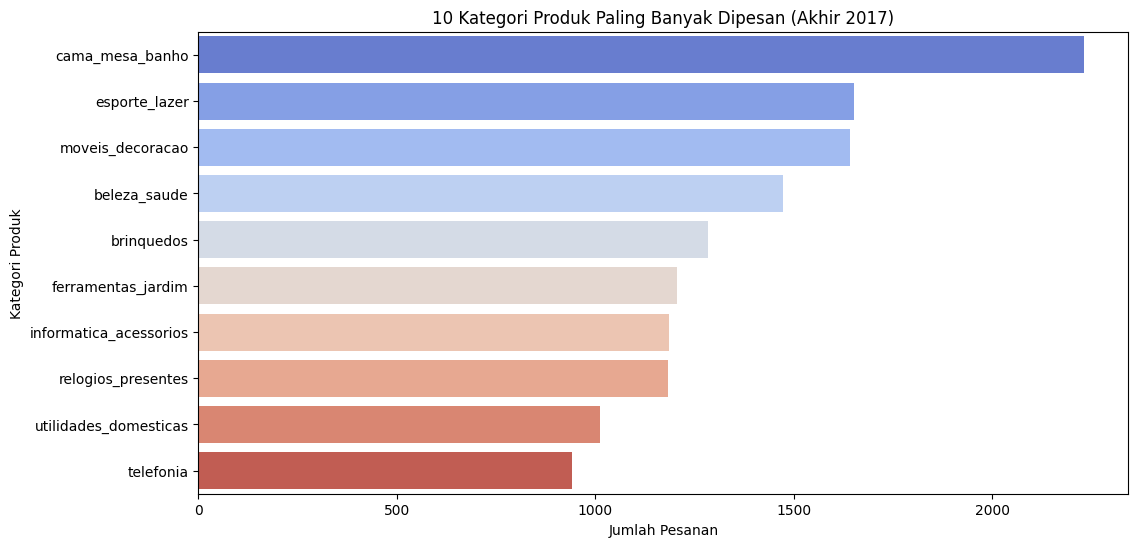

In [213]:
# Filter data hanya untuk akhir 2017 (Oktober - Desember)
end_2017_data = merged_data[(merged_data['order_purchase_timestamp'].dt.year == 2017) &
                            (merged_data['order_purchase_timestamp'].dt.month >= 10)]

# Hitung jumlah order berdasarkan kategori produk
top_categories_2017 = end_2017_data['product_category_name'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories_2017.values, y=top_categories_2017.index, hue=top_categories_2017.index, palette='coolwarm', legend=False)
plt.title('10 Kategori Produk Paling Banyak Dipesan (Akhir 2017)')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.show()

 Kategori cama mesa banho (bed, table, and bath) menjadi salah satu kategori teratas selama lonjakan pesanan di akhir 2017. Hal ini menunjukkan adanya peningkatan permintaan untuk produk rumah tangga, yang kemungkinan besar dipicu oleh momen akhir tahun seperti persiapan liburan, perayaan Natal, dan Tahun Baru. Produk musiman seperti sprei, handuk, dan perlengkapan rumah tangga lainnya cenderung mengalami peningkatan penjualan selama periode ini, karena banyak pelanggan yang ingin memperbarui dekorasi rumah mereka atau membeli hadiah untuk keluarga dan teman.

##### Analisis pengaruh hari besar

In [214]:
# Tambahkan kolom bulan dan hari
merged_data['order_month'] = merged_data['order_purchase_timestamp'].dt.month
merged_data['order_day'] = merged_data['order_purchase_timestamp'].dt.day

# Event besar di Brasil (misal Black Friday & Natal)
black_friday = (merged_data['order_month'] == 11) & (merged_data['order_day'] >= 20)
natal = (merged_data['order_month'] == 12) & (merged_data['order_day'] >= 15)

# Hitung jumlah pesanan pada event Black Friday & Natal
black_friday_orders = merged_data[black_friday].shape[0]
natal_orders = merged_data[natal].shape[0]

# Filter data untuk hari biasa (di luar event Black Friday & Natal)
normal_days = ~black_friday & ~natal
average_normal_orders = merged_data[normal_days].groupby(['order_month', 'order_day']).size().mean()

# Print hasil perbandingan
print(f"Pesanan saat Black Friday: {black_friday_orders}")
print(f"Pesanan saat Natal: {natal_orders}")
print(f"Rata-rata pesanan harian pada hari biasa: {round(average_normal_orders)}")

Pesanan saat Black Friday: 5382
Pesanan saat Natal: 2689
Rata-rata pesanan harian pada hari biasa: 330


Lonjakan pesanan yang signifikan pada akhir tahun 2017 kemungkinan besar dipengaruhi oleh event besar seperti Black Friday di akhir November dan jelang Natal di bulan Desember. Berdasarkan analisis, jumlah pesanan selama Black Friday dan Natal jauh lebih tinggi dibandingkan dengan rata-rata pesanan harian pada hari biasa. Hal ini menunjukkan bahwa periode promosi dan diskon besar-besaran pada event ini memiliki dampak signifikan terhadap peningkatan transaksi.

## Conclusion

### Pertanyaan 1: Bagaimana tren pesanan dari 2016 sampai 2018?

Hasil grafik analisis menunjukkan tren pesanan bulanan dari 2016 hingga 2018, dengan lonjakan signifikan pada November 2017 sebagai bulan dengan jumlah pesanan tertinggi. Peningkatan ini kemungkinan besar dipengaruhi oleh momen Black Friday, yang biasanya mendorong peningkatan transaksi akibat diskon besar-besaran. Selain itu, menjelang Natal, konsumen cenderung melakukan lebih banyak pembelian untuk persiapan liburan dan pemberian hadiah. Setelah lonjakan ini, pesanan mengalami sedikit penurunan tetapi tetap berada pada level tinggi dibandingkan periode sebelumnya, mencerminkan dampak musim belanja akhir tahun yang kuat terhadap tren pesanan.

### Pertanyaan 2: Kapan waktu terbaik pelanggan melakukan pemesanan?

Hari Minggu adalah awal minggu di Brasil. Jumlah pesanan paling rendah pada hari Sabtu dan mencapai puncaknya pada hari Senin (jumlah pesanan tertinggi), dan kemudian secara bertahap menurun hingga hari Sabtu (jumlah pesanan terendah). Pelanggan cenderung memesan paling banyak pada malam hari. Strategi bisnis seperti promosi atau diskon sebaiknya difokuskan pada hari-hari dan waktu ini untuk memaksimalkan penjualan.